In [1]:
import os 
import urllib2
# import urllib
import io
import gzip

def download_file(remote, local):
    url = remote

    u = urllib2.urlopen(url)
    f = open(local, 'wb')
    meta = u.info()
    
    file_size = int(meta.getheaders("Content-Length")[0])
    print "Downloading: %s Bytes: %s" % (local, file_size)

    file_size_dl = 0
    block_sz = 8192
    while True:
        buffer = u.read(block_sz)
        if not buffer:
            break

        file_size_dl += len(buffer)
        f.write(buffer)
        status = r"%10d  [%3.2f%%]" % (file_size_dl, file_size_dl * 100. / file_size)
        status = status + chr(8)*(len(status)+1)
#         print status,

    f.close()


data_dir = "../data"
data_file_url = "https://github.com/mnielsen/neural-networks-and-deep-learning/raw/master/data/mnist.pkl.gz"
if os.path.exists(data_dir) == False:
    os.makedirs(data_dir)
    print("Directory created: " + data_dir)

    
data_filename = "mnist.pkl.gz"
data_filepath = data_dir + "/" + data_filename 

download_file(remote = data_file_url, local = data_filepath)


# with urllib2.urlopen(data_file_url) as d:
#     data = d.read()
#     d.close()

# with open(data_filepath, 'wb') as f:
#     f.write(data)

print("# Completed downloading file: " + data_filename)

Downloading: ../data/mnist.pkl.gz Bytes: 17051982
# Completed downloading file: mnist.pkl.gz


In [2]:
import mnist_loader
import numpy as np 
import pandas as pd 

training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
print("Training data, validation data and test data loaded.")

Training data, validation data and test data loaded.


In [10]:
message = """
Repeat 8,9 using a regularization parameter lambda=0.1 (note python has a reserved word lambda):
net.SGD(training_data[:1000], 400, 10, 0.5,
... evaluation_data=test_data, lmbda = 0.1,
... monitor_evaluation_cost=True, monitor_evaluation_accuracy=True,
... monitor_training_cost=True, monitor_training_accuracy=True)
"""

import network2

net2 = network2.Network([784, 30, 10], cost=network2.CrossEntropyCost)
net2.large_weight_initializer()

epochs = 400

evaluation_cost, evaluation_accuracy, training_cost, training_accuracy = net2.SGD(
    training_data[:10000], 
    epochs, 
    10, 
    0.5, 
    evaluation_data=test_data,
    lmbda=0.1,
    monitor_evaluation_cost=True,
    monitor_evaluation_accuracy=True,
    monitor_training_cost=True,
    monitor_training_accuracy=True
)

Epoch 0 training complete
Cost on training data: 0.948709795623
Accuracy on training data: 8753 / 10000
Cost on evaluation data: 1.034100472
Accuracy on evaluation data: 8557 / 10000

Epoch 1 training complete
Cost on training data: 0.73015594784
Accuracy on training data: 9063 / 10000
Cost on evaluation data: 0.851004715191
Accuracy on evaluation data: 8824 / 10000

Epoch 2 training complete
Cost on training data: 0.610741223297
Accuracy on training data: 9288 / 10000
Cost on evaluation data: 0.761230727829
Accuracy on evaluation data: 9017 / 10000

Epoch 3 training complete
Cost on training data: 0.554676834922
Accuracy on training data: 9369 / 10000
Cost on evaluation data: 0.737468388182
Accuracy on evaluation data: 9079 / 10000

Epoch 4 training complete
Cost on training data: 0.521335070386
Accuracy on training data: 9430 / 10000
Cost on evaluation data: 0.704321042228
Accuracy on evaluation data: 9109 / 10000

Epoch 5 training complete
Cost on training data: 0.475575120133
Accur

Accuracy on evaluation data: 9284 / 10000

Epoch 44 training complete
Cost on training data: 0.173888293385
Accuracy on training data: 9929 / 10000
Cost on evaluation data: 0.672966003731
Accuracy on evaluation data: 9291 / 10000

Epoch 45 training complete
Cost on training data: 0.170104333817
Accuracy on training data: 9934 / 10000
Cost on evaluation data: 0.680808445752
Accuracy on evaluation data: 9271 / 10000

Epoch 46 training complete
Cost on training data: 0.168834821507
Accuracy on training data: 9929 / 10000
Cost on evaluation data: 0.674444485343
Accuracy on evaluation data: 9286 / 10000

Epoch 47 training complete
Cost on training data: 0.17278694774
Accuracy on training data: 9931 / 10000
Cost on evaluation data: 0.682278653721
Accuracy on evaluation data: 9265 / 10000

Epoch 48 training complete
Cost on training data: 0.165965719774
Accuracy on training data: 9933 / 10000
Cost on evaluation data: 0.674619265599
Accuracy on evaluation data: 9274 / 10000

Epoch 49 training 

Cost on evaluation data: 0.688281993184
Accuracy on evaluation data: 9301 / 10000

Epoch 88 training complete
Cost on training data: 0.116771830016
Accuracy on training data: 9974 / 10000
Cost on evaluation data: 0.693190594002
Accuracy on evaluation data: 9293 / 10000

Epoch 89 training complete
Cost on training data: 0.116426767965
Accuracy on training data: 9975 / 10000
Cost on evaluation data: 0.705205733705
Accuracy on evaluation data: 9294 / 10000

Epoch 90 training complete
Cost on training data: 0.119625707353
Accuracy on training data: 9972 / 10000
Cost on evaluation data: 0.691806200279
Accuracy on evaluation data: 9286 / 10000

Epoch 91 training complete
Cost on training data: 0.115052133891
Accuracy on training data: 9978 / 10000
Cost on evaluation data: 0.69638719423
Accuracy on evaluation data: 9297 / 10000

Epoch 92 training complete
Cost on training data: 0.112528728645
Accuracy on training data: 9973 / 10000
Cost on evaluation data: 0.689971011982
Accuracy on evaluatio

Epoch 131 training complete
Cost on training data: 0.0879039354836
Accuracy on training data: 9987 / 10000
Cost on evaluation data: 0.686927269841
Accuracy on evaluation data: 9307 / 10000

Epoch 132 training complete
Cost on training data: 0.0901291684919
Accuracy on training data: 9987 / 10000
Cost on evaluation data: 0.689488024501
Accuracy on evaluation data: 9300 / 10000

Epoch 133 training complete
Cost on training data: 0.0892604461213
Accuracy on training data: 9987 / 10000
Cost on evaluation data: 0.691909732311
Accuracy on evaluation data: 9303 / 10000

Epoch 134 training complete
Cost on training data: 0.0865598170227
Accuracy on training data: 9988 / 10000
Cost on evaluation data: 0.6878611441
Accuracy on evaluation data: 9306 / 10000

Epoch 135 training complete
Cost on training data: 0.0866399592137
Accuracy on training data: 9988 / 10000
Cost on evaluation data: 0.682154163205
Accuracy on evaluation data: 9317 / 10000

Epoch 136 training complete
Cost on training data: 0

Accuracy on training data: 9996 / 10000
Cost on evaluation data: 0.670259181616
Accuracy on evaluation data: 9330 / 10000

Epoch 175 training complete
Cost on training data: 0.0704498985711
Accuracy on training data: 9996 / 10000
Cost on evaluation data: 0.669162687428
Accuracy on evaluation data: 9320 / 10000

Epoch 176 training complete
Cost on training data: 0.0700831194216
Accuracy on training data: 9995 / 10000
Cost on evaluation data: 0.674244159322
Accuracy on evaluation data: 9324 / 10000

Epoch 177 training complete
Cost on training data: 0.0730965429863
Accuracy on training data: 9991 / 10000
Cost on evaluation data: 0.673436754442
Accuracy on evaluation data: 9316 / 10000

Epoch 178 training complete
Cost on training data: 0.0698043790409
Accuracy on training data: 9996 / 10000
Cost on evaluation data: 0.668857899748
Accuracy on evaluation data: 9336 / 10000

Epoch 179 training complete
Cost on training data: 0.0683634022742
Accuracy on training data: 9997 / 10000
Cost on ev

Cost on evaluation data: 0.652071489793
Accuracy on evaluation data: 9341 / 10000

Epoch 218 training complete
Cost on training data: 0.0599261509177
Accuracy on training data: 9998 / 10000
Cost on evaluation data: 0.648761825528
Accuracy on evaluation data: 9340 / 10000

Epoch 219 training complete
Cost on training data: 0.059738490076
Accuracy on training data: 9998 / 10000
Cost on evaluation data: 0.646961632677
Accuracy on evaluation data: 9342 / 10000

Epoch 220 training complete
Cost on training data: 0.0654012483529
Accuracy on training data: 9999 / 10000
Cost on evaluation data: 0.651219893956
Accuracy on evaluation data: 9342 / 10000

Epoch 221 training complete
Cost on training data: 0.0595287676249
Accuracy on training data: 9999 / 10000
Cost on evaluation data: 0.648635710988
Accuracy on evaluation data: 9340 / 10000

Epoch 222 training complete
Cost on training data: 0.0591655494188
Accuracy on training data: 9999 / 10000
Cost on evaluation data: 0.646204876814
Accuracy on

Cost on evaluation data: 0.627816397633
Accuracy on evaluation data: 9352 / 10000

Epoch 261 training complete
Cost on training data: 0.0526971269523
Accuracy on training data: 10000 / 10000
Cost on evaluation data: 0.62232425237
Accuracy on evaluation data: 9355 / 10000

Epoch 262 training complete
Cost on training data: 0.0531383317316
Accuracy on training data: 10000 / 10000
Cost on evaluation data: 0.635676115048
Accuracy on evaluation data: 9354 / 10000

Epoch 263 training complete
Cost on training data: 0.0545793861537
Accuracy on training data: 10000 / 10000
Cost on evaluation data: 0.636854561237
Accuracy on evaluation data: 9348 / 10000

Epoch 264 training complete
Cost on training data: 0.052874005029
Accuracy on training data: 10000 / 10000
Cost on evaluation data: 0.62943957757
Accuracy on evaluation data: 9337 / 10000

Epoch 265 training complete
Cost on training data: 0.0524299165603
Accuracy on training data: 10000 / 10000
Cost on evaluation data: 0.627563804301
Accuracy

Cost on evaluation data: 0.613273958636
Accuracy on evaluation data: 9366 / 10000

Epoch 304 training complete
Cost on training data: 0.0486575417232
Accuracy on training data: 10000 / 10000
Cost on evaluation data: 0.610688121733
Accuracy on evaluation data: 9351 / 10000

Epoch 305 training complete
Cost on training data: 0.103896909128
Accuracy on training data: 9951 / 10000
Cost on evaluation data: 0.689792049356
Accuracy on evaluation data: 9260 / 10000

Epoch 306 training complete
Cost on training data: 0.189236983114
Accuracy on training data: 9822 / 10000
Cost on evaluation data: 0.733559004734
Accuracy on evaluation data: 9210 / 10000

Epoch 307 training complete
Cost on training data: 0.176003451416
Accuracy on training data: 9842 / 10000
Cost on evaluation data: 0.684298597124
Accuracy on evaluation data: 9257 / 10000

Epoch 308 training complete
Cost on training data: 0.242133666064
Accuracy on training data: 9751 / 10000
Cost on evaluation data: 0.753241567095
Accuracy on e

Accuracy on evaluation data: 9377 / 10000

Epoch 347 training complete
Cost on training data: 0.0473245929024
Accuracy on training data: 10000 / 10000
Cost on evaluation data: 0.607143360587
Accuracy on evaluation data: 9371 / 10000

Epoch 348 training complete
Cost on training data: 0.0470835937568
Accuracy on training data: 10000 / 10000
Cost on evaluation data: 0.602241969214
Accuracy on evaluation data: 9367 / 10000

Epoch 349 training complete
Cost on training data: 0.0470238702706
Accuracy on training data: 10000 / 10000
Cost on evaluation data: 0.600517326318
Accuracy on evaluation data: 9375 / 10000

Epoch 350 training complete
Cost on training data: 0.0468351715679
Accuracy on training data: 10000 / 10000
Cost on evaluation data: 0.604465490752
Accuracy on evaluation data: 9374 / 10000

Epoch 351 training complete
Cost on training data: 0.0468849073061
Accuracy on training data: 10000 / 10000
Cost on evaluation data: 0.603098152572
Accuracy on evaluation data: 9371 / 10000

Ep

Accuracy on evaluation data: 9379 / 10000

Epoch 390 training complete
Cost on training data: 0.0443077085102
Accuracy on training data: 10000 / 10000
Cost on evaluation data: 0.589694086745
Accuracy on evaluation data: 9366 / 10000

Epoch 391 training complete
Cost on training data: 0.0442524839059
Accuracy on training data: 10000 / 10000
Cost on evaluation data: 0.588783126849
Accuracy on evaluation data: 9380 / 10000

Epoch 392 training complete
Cost on training data: 0.0441950635241
Accuracy on training data: 10000 / 10000
Cost on evaluation data: 0.590155600736
Accuracy on evaluation data: 9364 / 10000

Epoch 393 training complete
Cost on training data: 0.0445421909257
Accuracy on training data: 10000 / 10000
Cost on evaluation data: 0.589830159012
Accuracy on evaluation data: 9372 / 10000

Epoch 394 training complete
Cost on training data: 0.0440813762138
Accuracy on training data: 10000 / 10000
Cost on evaluation data: 0.591864368058
Accuracy on evaluation data: 9384 / 10000

Ep

In [9]:
print evaluation_cost, evaluation_accuracy, training_cost, training_accuracy

[1.0601689632680433, 0.91288121853150872, 0.84015182500425278] [8352, 8731, 8887] [0.95945716603696374, 0.76664541025605426, 0.68274986567476081] [8641, 8990, 9193]


In [11]:
import plot_helper

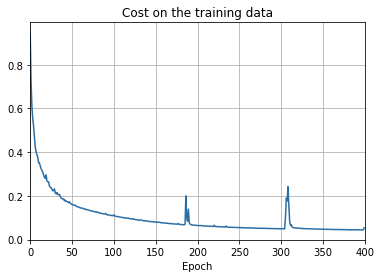

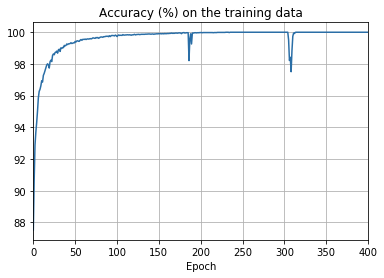

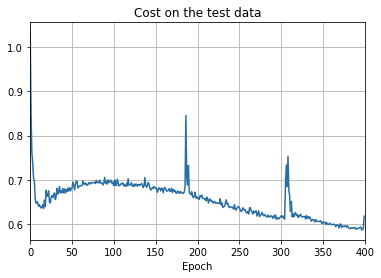

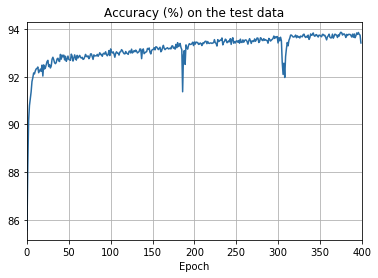

In [12]:
plot_helper.plot_training_cost(num_epochs=epochs, training_cost=training_cost, training_cost_xmin=0)
plot_helper.plot_training_accuracy(num_epochs=epochs, training_accuracy=training_accuracy, training_accuracy_xmin=0, training_set_size=10000)

plot_helper.plot_test_cost(num_epochs=epochs, test_cost=evaluation_cost, test_cost_xmin=0)
plot_helper.plot_test_accuracy(num_epochs=epochs, test_accuracy=evaluation_accuracy, test_accuracy_xmin=0)
